First few rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Summary statistics of the dataset:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   

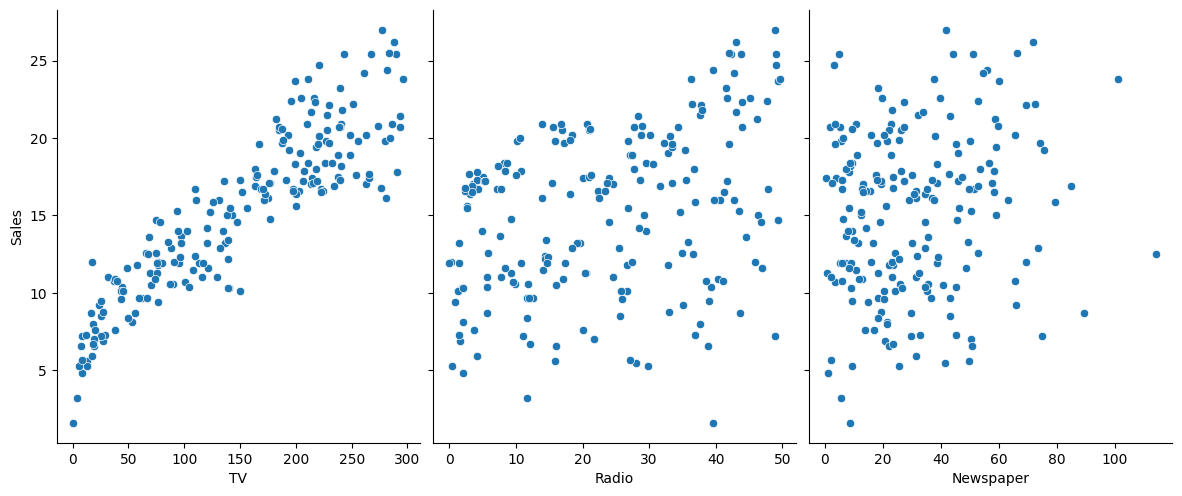


Missing values in the dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


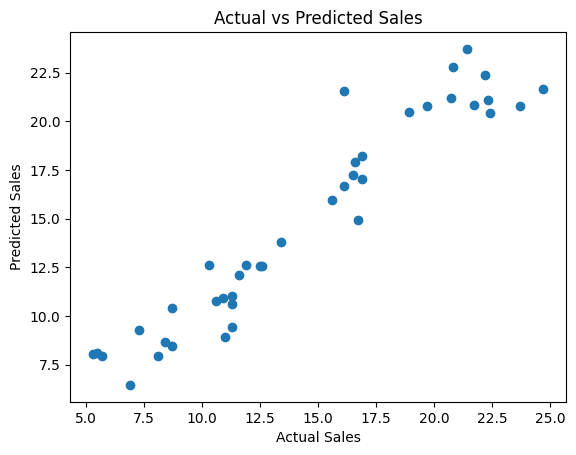

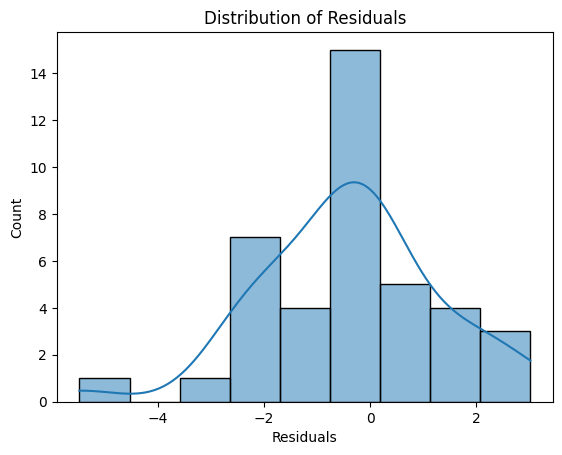

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/advertising.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())

# Display summary statistics
print("\nSummary statistics of the dataset:")
print(data.describe())

# Visualize the relationships between features and the target variable
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8)
plt.show()

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Define the feature variables (X) and the target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Plot the residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()
